<h1 align="center">S2R Analytics</h1>
<h2 align="center">Profitability of Client X projects: run 1</h2>

# Table of Contents

* [Part 6](#part6): Classification
    * [6.0](#6_0): Data splitting
    * [6.1](#6_1): Models
<br />
<br />
* [Part 7](#part7): Fine-tuning
* [Part 8](#part8): Ensemble learning
* [Part 9](#part9): Evaluation of the final model

## Notebook Setup

In [16]:
# Essentials
import pandas as pd
from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
import sqlite3
import pyodbc
import numpy as np; np.random.seed(1)

# Image creation and display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
from yellowbrick.model_selection import FeatureImportances

# Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Metrics of accuracy
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from pycm import *
import imbalanced_ensemble as imbens
from imbalanced_ensemble.ensemble.base import sort_dict_by_key
from collections import Counter

# Fine-tuning and enseble learning
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Other
import itertools as it
import io
import os
os.sys.path
import sys
import glob
import concurrent.futures
from __future__ import print_function
import binascii
import struct
from PIL import Image
import scipy
import scipy.misc
import scipy.cluster
import datetime, time
import functools, operator
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

In [22]:
df = pd.read_csv('../csv-files/complete_projects.csv')

In [23]:
df

,Project ID,Country,Office,Sector,Project Size Sort Order,Is Multi Discipline Project,Is Multi Team,Team Size,Perc of Team Recent,Is First Client Project,Perc of Subcontractors,Is Front Loaded,Project Duration Weeks,Director Is Recent,Manager Is Recent,Perc of Stages with Hourly Rates,Profit Class
0,367704,0,6,6,4,0,1,12,25.0,1,0.0,1,4.0,0,0,20.0,1
1,367705,0,3,0,1,0,0,1,0.0,1,0.0,0,412.0,0,0,100.0,2
2,367706,0,3,0,1,0,0,1,0.0,1,0.0,0,0.0,0,0,100.0,2
3,367707,0,3,1,3,0,0,1,0.0,1,0.0,0,381.0,0,0,75.0,1
4,367708,0,3,0,7,0,0,1,0.0,1,0.0,0,401.0,0,0,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6117,375886,0,3,2,7,0,0,0,100.0,0,0.0,0,94.0,1,1,0.0,1
6118,429679,0,3,2,6,0,0,0,100.0,0,0.0,0,13.0,1,1,0.0,1
6119,826980,0,3,6,4,0,0,0,100.0,0,0.0,0,16.0,1,1,0.0,1
6120,972938,0,3,6,4,0,0,0,100.0,0,0.0,0,0.0,1,1,0.0,1


## Part 6: <a class="anchor" id="part6"></a> Classification

### 6.0 <a class="anchor" id="6_0"></a> Data splitting

In [24]:
df.rename(columns = {'Profit Class':'Profit_Class'}, inplace=True)

In [25]:
# Choose dependent variables
Y = df[['Profit_Class']]

# Drop the dependent variables from the feature data set
X = df.drop(columns = ['Profit_Class'])

# Scale the explanatory variables
X1 = pd.DataFrame(StandardScaler().fit_transform(X))
X1.columns = X.columns
X = X1

# Split data set into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, stratify = Y)

print(f'No. of training data: {X_train.shape[0]}')
print(f'No. of training targets: {Y_train.shape[0]}')
print(f'No. of testing data: {X_test.shape[0]}')
print(f'No. of testing targets: {Y_test.shape[0]}')

No. of training data: 4897
No. of training targets: 4897
No. of testing data: 1225
No. of testing targets: 1225


In [31]:
for i in range(3):
    print(f'Class {i} has {(Y.Profit_Class==i).sum()} samples in full dataset.')
    print(f'Class {i} has {(Y_train.Profit_Class==i).sum()} samples in training set.')
    print(f'Class {i} has {(Y_test.Profit_Class==i).sum()} samples in test set.')

Class 0 has 706 samples in full dataset.
Class 0 has 565 samples in training set.
Class 0 has 141 samples in test set.
Class 1 has 1998 samples in full dataset.
Class 1 has 1598 samples in training set.
Class 1 has 400 samples in test set.
Class 2 has 3418 samples in full dataset.
Class 2 has 2734 samples in training set.
Class 2 has 684 samples in test set.


### 6.1 <a class="anchor" id="6_1"></a> Models

#### 6.1.1  <a class="anchor" id="6_1_1"></a> Logistic regression

In [6]:
# Create a logistic regression model
log = LogisticRegression(random_state = 1, max_iter = 30000)

# Train the model using train set
log.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
log_y_pred=log.predict(X_test)

# Accuracy measures
print('Precision score of LOG: ' + str(round(metrics.precision_score(Y_test, np.round(log_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('F1 of LOG: ' + str(round(metrics.f1_score(Y_test, np.round(log_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of LOG: ' + str(round(metrics.recall_score(Y_test, np.round(log_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('Accuracy score of LOG: ' + str(round(metrics.accuracy_score(Y_test, np.round(log_y_pred)), 3)*100)+'%')

Precision score of LOG: 54.0%
F1 of LOG: 50.1%
Recall score of LOG: 58.4%
Accuracy score of LOG: 58.4%


#### 6.1.2 <a class="anchor" id="6_1_2"></a> K-Neighbours classifier

In [7]:
# Create a k-Neighbours classifier model with 7 neighbours
np.random.seed(1)
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Train the model using train set
knn_7.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
knn_7_y_pred = knn_7.predict(X_test)

# Accuracy measures
print('Precision score of KNN-7: ' + str(round(metrics.precision_score(Y_test, np.round(knn_7_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of KNN-7: ' + str(round(metrics.f1_score(Y_test, np.round(knn_7_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of KNN-7: ' + str(round(metrics.recall_score(Y_test, np.round(knn_7_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of KNN-7: ' + str(round(metrics.accuracy_score(Y_test, np.round(knn_7_y_pred)), 3)*100)+'%')

Precision score of KNN-7: 52.300000000000004%
F1 of KNN-7: 53.1%
Recall score of KNN-7: 55.300000000000004%
Accuracy score of KNN-7: 55.300000000000004%


#### 6.1.3  <a class="anchor" id="6_1_3"></a> Decision tree classifier

In [8]:
# Create a decision tree classifier model
dtc = DecisionTreeClassifier(random_state = 1)

# Train the model using train set
dtc = dtc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
dtc_y_pred = dtc.predict(X_test)

# Accuracy measures
print('Precision score of DTC: ' + str(round(metrics.precision_score(Y_test, np.round(dtc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of DTC: ' + str(round(metrics.f1_score(Y_test, np.round(dtc_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of DTC: ' + str(round(metrics.recall_score(Y_test, np.round(dtc_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of DTC: ' + str(round(metrics.accuracy_score(Y_test, np.round(dtc_y_pred)), 3)*100)+'%')

Precision score of DTC: 47.8%
F1 of DTC: 47.599999999999994%
Recall score of DTC: 47.5%
Accuracy score of DTC: 47.5%


#### 6.1.4  <a class="anchor" id="6_1_4"></a> Random forest classifier

In [9]:
# Create a random forest classifier model
rfc = RandomForestClassifier(random_state = 1)

# Train the model using train set
rfc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
rfc_y_pred=rfc.predict(X_test)

# Accuracy measures
print('Precision score of RFC: ' + str(round(metrics.precision_score(Y_test, np.round(rfc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of RFC: ' + str(round(metrics.f1_score(Y_test, np.round(rfc_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of RFC: ' + str(round(metrics.recall_score(Y_test, np.round(rfc_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of RFC: ' + str(round(metrics.accuracy_score(Y_test, np.round(rfc_y_pred)), 3)*100)+'%')

Precision score of RFC: 53.0%
F1 of RFC: 53.300000000000004%
Recall score of RFC: 57.699999999999996%
Accuracy score of RFC: 57.699999999999996%


#### 6.1.5  <a class="anchor" id="6_1_5"></a> XGBoost classifier

In [10]:
# Create a Gaussian classifier model
xgbc = XGBClassifier(n_estimators=100, learning_rate=0.05, booster='gbtree', random_state = 1, eval_metric='mlogloss', use_label_encoder=False)

# Train the model using train set
xgbc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
xgbc_y_pred=xgbc.predict(X_test)

# Accuracy measures
print('Precision score of XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(xgbc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(xgbc_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(xgbc_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(xgbc_y_pred)), 3)*100)+'%')

Precision score of XGBC: 52.1%
F1 of XGBC: 51.800000000000004%
Recall score of XGBC: 57.8%
Accuracy score of XGBC: 57.8%


#### 6.1.6  <a class="anchor" id="6_1_6"></a> Naive Bayes

In [11]:
# Create a Naive Bayes model
gnb = GaussianNB()

# Train the model using train set
gnb.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
gnb_y_pred = gnb.predict(X_test)

# Accuracy measures
print('Precision score of GNB: ' + str(round(metrics.precision_score(Y_test, np.round(gnb_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of GNB: ' + str(round(metrics.f1_score(Y_test, np.round(gnb_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of GNB: ' + str(round(metrics.recall_score(Y_test, np.round(gnb_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of GNB: ' + str(round(metrics.accuracy_score(Y_test, np.round(gnb_y_pred)), 3)*100)+'%')

Precision score of GNB: 51.1%
F1 of GNB: 47.599999999999994%
Recall score of GNB: 56.00000000000001%
Accuracy score of GNB: 56.00000000000001%


#### 6.1.7  <a class="anchor" id="6_1_7"></a> Linear discriminant analysis

In [12]:
# Create a linear discriminant analysis model
lda = LinearDiscriminantAnalysis(n_components = 2)

# Train the model using train set
lda.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
lda_y_pred = lda.predict(X_test)

# Accuracy measures
print('Precision score of LDA: ' + str(round(metrics.precision_score(Y_test, np.round(lda_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of LDA: ' + str(round(metrics.f1_score(Y_test, np.round(lda_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of LDA: ' + str(round(metrics.recall_score(Y_test, np.round(lda_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of LDA: ' + str(round(metrics.accuracy_score(Y_test, np.round(lda_y_pred)), 3)*100)+'%')

Precision score of LDA: 54.900000000000006%
F1 of LDA: 49.9%
Recall score of LDA: 58.5%
Accuracy score of LDA: 58.5%


#### 6.1.8  <a class="anchor" id="6_1_8"></a> Quadratic discriminant analysis

In [13]:
# Create a quadratic discriminant analysis model
qda = QuadraticDiscriminantAnalysis()

# Train the model using train set
qda.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
qda_y_pred = qda.predict(X_test)

# Accuracy measures
print('Precision score of QDA: ' + str(round(metrics.precision_score(Y_test, np.round(qda_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of QDA: ' + str(round(metrics.f1_score(Y_test, np.round(qda_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of QDA: ' + str(round(metrics.recall_score(Y_test, np.round(qda_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of QDA: ' + str(round(metrics.accuracy_score(Y_test, np.round(qda_y_pred)), 3)*100)+'%')

Precision score of QDA: 49.6%
F1 of QDA: 46.7%
Recall score of QDA: 55.800000000000004%
Accuracy score of QDA: 55.800000000000004%


#### 6.1.9  <a class="anchor" id="6_1_9"></a> Ridge regression classifier

In [14]:
# Create a ridge regression classifier model
rdg = RidgeClassifier(alpha=1.0, random_state = 1, max_iter = 30000)

# Train the model using train set
rdg.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
rdg_y_pred=rdg.predict(X_test)

# Accuracy measures
print('Precision score of RDG: ' + str(round(metrics.precision_score(Y_test, np.round(rdg_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('F1 of RDG: ' + str(round(metrics.f1_score(Y_test, np.round(rdg_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of RDG: ' + str(round(metrics.recall_score(Y_test, np.round(rdg_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('Accuracy score of RDG: ' + str(round(metrics.accuracy_score(Y_test, np.round(rdg_y_pred)), 3)*100)+'%')

Precision score of RDG: 53.7%
F1 of RDG: 49.0%
Recall score of RDG: 58.4%
Accuracy score of RDG: 58.4%


#### 6.1.10  <a class="anchor" id="6_1_10"></a> Support vector machines

In [15]:
# Create an SVM Classifier model
svm = SVC(kernel='linear', random_state = 1, probability=True)

# Train the model using the train set
svm.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
svm_y_pred = svm.predict(X_test)

# Accuracy measures
print('Precision score of SVM: ' + str(round(metrics.precision_score(Y_test, np.round(svm_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of SVM: ' + str(round(metrics.f1_score(Y_test, np.round(svm_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of SVM: ' + str(round(metrics.recall_score(Y_test, np.round(svm_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of SVM: ' + str(round(metrics.accuracy_score(Y_test, np.round(svm_y_pred)), 3)*100)+'%')

Precision score of SVM: 58.8%
F1 of SVM: 44.4%
Recall score of SVM: 56.89999999999999%
Accuracy score of SVM: 56.89999999999999%


In [52]:
y_actu = Y_test['Profit_Class'].to_numpy()
y_pred = svm_y_pred
cm = ConfusionMatrix(actual_vector=y_actu, predict_vector=y_pred)
cm.classes
print(cm)

Predict   0         1         2         
Actual
0         0         17        124       

1         0         28        372       

2         0         15        669       





Overall Statistics : 

95% CI                                                            (0.54125,0.59671)
ACC Macro                                                         0.71265
ARI                                                               0.03637
AUNP                                                              0.5222
AUNU                                                              0.51541
Bangdiwala B                                                      0.54619
Bennett S                                                         0.35347
CBA                                                               0.21475
CSI                                                               None
Chi-Squared                                                       None
Chi-Squared DF                                          

[Text(0, 0.5, 'negative'), Text(0, 1.5, 'low'), Text(0, 2.5, 'good')]

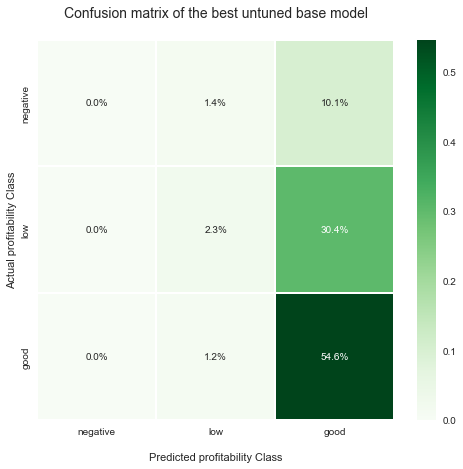

In [53]:
plt.subplots(figsize = (8,7))
final_matrix = confusion_matrix(Y_test, svm_y_pred)
ax = sns.heatmap(final_matrix/np.sum(final_matrix), annot=True, fmt='.1%', linewidths=.2, cmap='Greens')

ax.set_title('Confusion matrix of the best untuned base model\n', fontsize = 14)
ax.set_xlabel('\nPredicted profitability Class')
ax.set_ylabel('Actual profitability Class')
ax.xaxis.set_ticklabels(['negative','low', 'good'])
ax.yaxis.set_ticklabels(['negative','low', 'good'])

## Part 7: <a class="anchor" id="part7"></a> Fine-tuning

### 7.1  <a class="anchor" id="7_1"></a> XGBoost grid search

In [42]:
# Look at parameters used by our current XGBoost model
print('Parameters currently in use:\n')
pprint(xgbc.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.05,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'multi:softprob',
 'predictor': 'auto',
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}


In [45]:
# Defining parameter range
xgbc_grid = {'learning_rate':[0.1],
    'n_estimators':[1000],
    'max_depth':[4,5,6],
    'min_child_weight':[6,8,10,12],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'objective':['binary:logistic'],
    'nthread':[4],
    'seed':[1],
    'eval_metric':['mlogloss']}

pprint(xgbc_grid)

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
 'eval_metric': ['mlogloss'],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [0.1],
 'max_depth': [4, 5, 6],
 'min_child_weight': [6, 8, 10, 12],
 'n_estimators': [1000],
 'nthread': [4],
 'objective': ['binary:logistic'],
 'seed': [1],
 'subsample': [0.6, 0.7, 0.8, 0.9]}


In [46]:
# Fitting the model for grid search
xgbc_tuned = GridSearchCV(XGBClassifier(), xgbc_grid, refit = True)
xgbc_tuned.fit(X_train, Y_train.values.ravel())

In [ ]:
# Print best parameter after tuning
print(xgbc_tuned.best_params_)
 
# Print how our model looks after hyper-parameter tuning
print(xgbc_tuned.best_estimator_)

In [40]:
# Create a XGBoost_tuned model
xgbc_tuned = XGBClassifier(colsample_bytree=0.6, eval_metric='mlogloss',
gamma=0.2, learning_rate=0.1, max_depth=4, metric='muticlass',
min_child_weight=12, n_estimators=1000, nthread=4, objective='binary:logistic',
scale_pos_weight = 1, seed=1, subsample=0.9)


In [41]:
# Base model results
xgbc_base_y_pred = xgbc.predict(X_test)
xgbc_base_accuracy = round(metrics.accuracy_score(Y_test, np.round(xgbc_base_y_pred)), 3)*100
print('Accuracy of base XGBC is ' + str(xgbc_base_accuracy)+'%')

# Tuned model results
#xgbc_tuned = xgbc_tuned.best_estimator_
xgbc_tuned.fit(X_train, Y_train.values.ravel())
xgbc_tuned_y_pred = xgbc_tuned.predict(X_test)
xgbc_tuned_accuracy = round(metrics.accuracy_score(Y_test, np.round(xgbc_tuned_y_pred)), 3)*100
print('Accuracy of tuned XGBC is ' + str(xgbc_tuned_accuracy)+'%')

# Comparison
print('Improvement of {:0.1f}%'.format(100 * (xgbc_tuned_accuracy - xgbc_base_accuracy) / xgbc_base_accuracy))

Accuracy of base XGBC is 57.8%
[15:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "metric", "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Accuracy of tuned XGBC is 57.599999999999994%
Improvement of -0.3%


### 7.2  <a class="anchor" id="7_2"></a> Random forest classifier grid search

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                     'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                      'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [37]:
rfc_tuned = RandomizedSearchCV(estimator = rfc,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 5,
                               verbose = 2,
                               random_state = 1,
                               n_jobs = -1)
                               
# Fit the random search model
rfc_tuned.fit(X_train, Y_train.values.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=1, verbose=2)

In [38]:
# Base model results
rfc_base_y_pred = rfc.predict(X_test)
rfc_base_accuracy = round(metrics.accuracy_score(Y_test, np.round(rfc_base_y_pred)), 3)*100
print('Accuracy of base RFC is ' + str(rfc_base_accuracy)+'%')

# Tuned model results
rfc_tuned = rfc_tuned.best_estimator_
rfc_tuned.fit(X_train, Y_train.values.ravel())
rfc_tuned_y_pred = rfc_tuned.predict(X_test)
rfc_tuned_accuracy = round(metrics.accuracy_score(Y_test, np.round(rfc_tuned_y_pred)), 3)*100
print('Accuracy of tuned RFC is ' + str(rfc_tuned_accuracy)+'%')

# Comparison
print('Improvement of {:0.1f}%'.format(100 * (rfc_tuned_accuracy - rfc_base_accuracy) / rfc_base_accuracy))

Accuracy of base RFC is 57.699999999999996%


c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of tuned RFC is 59.0%
Improvement of 2.3%


In [39]:
print('Precision score of tuned RFC: ' + str(round(metrics.precision_score(Y_test, np.round(rfc_tuned_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of tuned RFC: ' + str(round(metrics.f1_score(Y_test, np.round(rfc_tuned_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of tuned RFC: ' + str(round(metrics.recall_score(Y_test, np.round(rfc_tuned_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of tuned RFC: ' + str(round(metrics.accuracy_score(Y_test, np.round(rfc_tuned_y_pred)), 3)*100)+'%')

Precision score of tuned RFC: 54.300000000000004%
F1 of tuned RFC: 51.5%
Recall score of tuned RFC: 59.0%
Accuracy score of tuned RFC: 59.0%


### 7.3  <a class="anchor" id="7_3"></a> SVM RBF grid search

In [25]:
# Look at parameters used by our current SVM model
print('Parameters currently in use:\n')
pprint(svm.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [26]:
# Defining parameter range
svm_grid = {'C': [0.1, 1, 10],
            'gamma': [1, 0.1, 0.01],
            'kernel': ['linear']}
 
# Fitting the model for grid search
svm_tuned = GridSearchCV(SVC(), svm_grid, refit = True) 
svm_tuned.fit(X_train, Y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']})

In [27]:
# Print best parameter after tuning
print(svm_tuned.best_params_)
 
# Print how our model looks after hyper-parameter tuning
print(svm_tuned.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [28]:
# Create a tuned SVC model with linear kernel
svm_tuned = SVC(kernel='linear', C = 0.1, gamma = 1, random_state = 1, probability=True)
svm_tuned.fit(X_train, Y_train.values.ravel())

SVC(C=0.1, gamma=1, kernel='linear', probability=True, random_state=1)

In [29]:
# Base model results
svm_base_y_pred = svm.predict(X_test)
svm_base_accuracy = round(metrics.accuracy_score(Y_test, svm_base_y_pred), 3)*100
print('Accuracy of base SVM is ' + str(svm_base_accuracy)+'%')

# Tuned model results
svm_tuned_y_pred = svm_tuned.predict(X_test)
svm_tuned_accuracy = round(metrics.accuracy_score(Y_test, svm_tuned_y_pred), 3)*100
print('Accuracy of tuned SVM with linear kernel is ' + str(svm_tuned_accuracy)+'%')

print('Improvement of {:0.2f}%'.format(100 * (svm_tuned_accuracy - svm_base_accuracy) / svm_base_accuracy))

Accuracy of base SVM is 56.89999999999999%
Accuracy of tuned SVM with linear kernel is 56.89999999999999%
Improvement of 0.00%


In [30]:
# Rest of the measures
print('Precision score of tuned SVM with linear kernel: ' + str(round(metrics.precision_score(Y_test, np.round(svm_tuned_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of tuned SVM with linear kernel: ' + str(round(metrics.recall_score(Y_test, np.round(svm_tuned_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of tuned SVM with linear kernel: ' + str(round(metrics.f1_score(Y_test, np.round(svm_tuned_y_pred), average='weighted'), 3)*100)+'%')

Precision score of tuned SVM with linear kernel: 58.8%
Recall score of tuned SVM with linear kernel: 56.89999999999999%
F1 of tuned SVM with linear kernel: 44.4%


In [31]:
# Create a tuned SVC model with RBF kernel
svm_tuned = SVC(kernel='rbf', C = 2, gamma = 1, random_state = 1, probability=True)
svm_tuned.fit(X_train, Y_train.values.ravel())

SVC(C=2, gamma=1, probability=True, random_state=1)

In [36]:
# Base model results
svm_base_y_pred = svm.predict(X_test)
svm_base_precision = round(metrics.precision_score(Y_test, np.round(svm_base_y_pred), average='weighted', zero_division=1), 3)*100
print('Precision of base SVM is ' + str(svm_base_accuracy)+'%')

# Tuned model results with kernel
svm_tuned_y_pred = svm_tuned.predict(X_test)
svm_tuned_precision = round(metrics.precision_score(Y_test, np.round(svm_tuned_y_pred), average='weighted', zero_division=1), 3)*100
print('Precision of tuned SVM with RBF kernel is ' + str(svm_tuned_accuracy)+'%')

print('Improvement of {:0.2f}%'.format(100 * (svm_tuned_precision - svm_base_precision) / svm_base_precision))

Precision of base SVM is 56.89999999999999%
Precision of tuned SVM with RBF kernel is 53.7%
Improvement of -17.18%


In [39]:
# Rest of the measures
print('F1 of tuned SVM with RBF kernel: ' + str(round(metrics.f1_score(Y_test, np.round(svm_tuned_y_pred), average='weighted'), 3)*100)+'%')
print('Recall of tuned SVM with RBF kernel: ' + str(round(metrics.recall_score(Y_test, np.round(svm_tuned_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy of tuned SVM with RBF kernel: ' + str(round(metrics.accuracy_score(Y_test, np.round(svm_tuned_y_pred)), 3)*100)+'%')

F1 of tuned SVM with RBF kernel: 48.199999999999996%
Recall of tuned SVM with RBF kernel: 53.7%
Accuracy of tuned SVM with RBF kernel: 53.7%


## Part 8: <a class="anchor" id="part8"></a> Ensemble learning

### 8.1  <a class="anchor" id="8_1"></a> Voting classifier

In [40]:
soft_voting = VotingClassifier(estimators=[('svm', svm), ('lda', lda), ('rfc_tuned', rfc_tuned)], voting='soft')
soft_voting.fit(X_train, Y_train.values.ravel())
sv_y_pred = soft_voting.predict(X_test)

c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [41]:
print('Precision score of soft voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(sv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of soft voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(sv_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of soft voting classifier ' + str(round(metrics.recall_score(Y_test, np.round(sv_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of soft voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(sv_y_pred)), 3)*100)+'%')

Precision score of soft voting classifier: 52.7%
F1 of soft voting classifier: 47.099999999999994%
Recall score of soft voting classifier 57.8%
Accuracy score of soft voting classifier: 57.8%


In [44]:
hard_voting = VotingClassifier(estimators=[('svm', svm), ('lda', lda), ('rfc_tuned', rfc_tuned)], voting='hard')
hard_voting.fit(X_train, Y_train.values.ravel())
hv_y_pred = hard_voting.predict(X_test)

c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [47]:
print('Precision score of hard voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(hv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of hard voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(hv_y_pred), average='weighted'), 3)*100)+'%')
print('Recall score of hard voting classifier ' + str(round(metrics.recall_score(Y_test, np.round(hv_y_pred), average='weighted'), 3)*100)+'%')
print('Accuracy score of hard voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(hv_y_pred)), 3)*100)+'%')

Precision score of hard voting classifier: 55.50000000000001%
F1 of hard voting classifier: 49.4%
Recall score of hard voting classifier 58.9%
Accuracy score of hard voting classifier: 58.9%


### 8.2  <a class="anchor" id="8_2"></a> Stacking

#### 8.2.1  <a class="anchor" id="8_2_1"></a> Top 9 models

In [ ]:
def get_stacking():
	# Define the base models
	level9 = list()
	level9.append(('gnb', gnb))
	level9.append(('qda', qda))
	level9.append(('log', log))
	level9.append(('knn', knn_7))
	level9.append(('dtc', dtc))
	level9.append(('xgbc tuned', xgbc_tuned))
	level9.append(('soft voting', soft_voting))
	level9.append(('rfc tuned', rfc_tuned))
	level9.append(('lda', lda))
	
	# Define the stacking ensemble learnt on tuned RFC
	model = StackingClassifier(estimators=level9, final_estimator=rfc_tuned, cv=5)
	return model

In [ ]:
# Define the base models separately
level9 = list()
level9.append(('gnb', gnb))
level9.append(('qda', qda))
level9.append(('log', log))
level9.append(('knn', knn_7))
level9.append(('dtc', dtc))
level9.append(('xgbc tuned', xgbc_tuned))
level9.append(('soft voting', soft_voting))
level9.append(('rfc tuned', rfc_tuned))
level9.append(('lda', lda))
level9.append(('stacking', get_stacking()))

In [ ]:
# Define the stacking ensemble learnt on tuned RFC
stack9_rfc_t = StackingClassifier(estimators=level9, final_estimator=rfc_tuned, cv=5)

# Fit the model on all available data
stack9_rfc_t = stack9_rfc_t.fit(X, Y.values.ravel())

# Predict the response for test set
stack9_rfc_t_y_pred = stack9_rfc_t.predict(X_test)

In [ ]:
# Accuracy measures
print('Accuracy score with 9 models learnt on tuned RFC: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack9_rfc_t_y_pred)), 3)*100)+'%')
print('Recall score with 9 models learnt on tuned RFC: ' + str(round(metrics.recall_score(Y_test, np.round(stack9_rfc_t_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 9 models learnt on tuned RFC: ' + str(round(metrics.precision_score(Y_test, np.round(stack9_rfc_t_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 9 models learnt on tuned RFC: ' + str(round(metrics.f1_score(Y_test, np.round(stack9_rfc_t_y_pred), average='weighted'), 3)*100)+'%')

In [ ]:
def get_stacking():
	# Define the base models
	level9 = list()
	level9.append(('gnb', gnb))
	level9.append(('qda', qda))
	level9.append(('log', log))
	level9.append(('knn', knn_7))
	level9.append(('dtc', dtc))
	level9.append(('xgbc tuned', xgbc_tuned))
	level9.append(('soft voting', soft_voting))
	level9.append(('rfc tuned', rfc_tuned))
	level9.append(('lda', lda))
	
	# Define the stacking ensemble learnt on base XGBC
	model = StackingClassifier(estimators=level9, final_estimator=xgbc, cv=5)
	return model

In [ ]:
# Define the base models separately
level9 = list()
level9.append(('gnb', gnb))
level9.append(('qda', qda))
level9.append(('log', log))
level9.append(('knn', knn_7))
level9.append(('dtc', dtc))
level9.append(('xgbc tuned', xgbc_tuned))
level9.append(('soft voting', soft_voting))
level9.append(('rfc tuned', rfc_tuned))
level9.append(('lda', lda))
level9.append(('stacking', get_stacking()))

In [ ]:
# Define the stacking ensemble learnt on base XGBC
xgbc_stack9 = StackingClassifier(estimators=level9, final_estimator=xgbc, cv=5)

# Fit the model on all available data
xgbc_stack9 = xgbc_stack9.fit(X, Y.values.ravel())

# Predict the response for test set
xgbc_stack9_y_pred = xgbc_stack9.predict(X_test)

In [ ]:
# Accuracy measures
print('Accuracy score with 9 models learnt on base XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(xgbc_stack9_y_pred)), 3)*100)+'%')
print('Recall score with 9 models learnt on base XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(xgbc_stack9_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 9 models learnt on base XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(xgbc_stack9_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 9 models learnt on base XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(xgbc_stack9_y_pred), average='weighted'), 3)*100)+'%')

#### 8.2.2  <a class="anchor" id="8_2_2"></a> Top 8 models

In [ ]:
# Define the base models
level0 = list()
level0.append(('log', log))
level0.append(('knn', knn_7))
level0.append(('dtc', dtc))
level0.append(('xgbc tuned', xgbc_tuned))
level0.append(('soft voting', soft_voting))
level0.append(('rfc tuned', rfc_tuned))
level0.append(('lda', lda))
level0.append(('stacking', get_stacking()))

# Define meta learner model
level1 = xgbc

# Define the final stacking ensemble
final1 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# Fit the model on all available data
final1 = final1.fit(X, Y.values.ravel())

# Predict the response for test set
final1_y_pred = final1.predict(X_test)

# Make a prediction for one example
random_project = X.sample(n=1)
yhat1 = final1.predict(random_project)
print('Predicted Recoverability Class: %d' % (yhat1))

In [ ]:
# Get a stacking ensemble of models
def get_stacking():
	# Define the base models
	level8 = list()
	level8.append(('qda', qda))
	level8.append(('lda', lda))
	level8.append(('log', log))
	level8.append(('knn', knn_7))
	level8.append(('dtc', dtc))
	level8.append(('soft voting', soft_voting))
	level8.append(('rfc tuned', rfc_tuned))
	level8.append(('xgbc tuned', xgbc_tuned))

	# Define the stacking ensemble
	model = StackingClassifier(estimators=level8, final_estimator=xgbc_tuned, cv=5)
	return model

# Define the base models separately
level8 = list()
level8.append(('qda', qda))
level8.append(('lda', lda))
level8.append(('log', log))
level8.append(('knn', knn_7))
level8.append(('dtc', dtc))
level8.append(('soft voting', soft_voting))
level8.append(('rfc tuned', rfc_tuned))
level8.append(('xgbc tuned', xgbc_tuned))
level8.append(('stacking', get_stacking()))

In [ ]:
# Define the final stacking ensemble
xgbc_stack8 = StackingClassifier(estimators=level8, final_estimator=xgbc, cv=5)

# Fit the model on all available data
xgbc_stack8 = xgbc_stack8.fit(X, Y.values.ravel())

# Predict the response for test set
xgbc_stack8_y_pred = xgbc_stack8.predict(X_test)

In [ ]:
# Accuracy measures
print('Accuracy score with 8 models learnt on base XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(xgbc_stack8_y_pred)), 3)*100)+'%')
print('Recall score with 8 models learnt on base XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(xgbc_stack8_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 8 models learnt on base XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(xgbc_stack8_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 8 models learnt on base XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(xgbc_stack8_y_pred), average='weighted'), 3)*100)+'%')

#### 8.2.3  <a class="anchor" id="8_2_3"></a> Top 7 models

In [ ]:
# Define the base models separately
level7 = list()
level7.append(('lda', lda))
level7.append(('log', log))
level7.append(('knn', knn_7))
level7.append(('dtc', dtc))
level7.append(('soft voting', soft_voting))
level7.append(('rfc tuned', rfc_tuned))
level7.append(('xgbc tuned', xgbc_tuned))
level7.append(('stacking', get_stacking()))

In [ ]:
def get_stacking():
	# Define the base models
	level7 = list()
	level7.append(('lda', lda))
	level7.append(('log', log))
	level7.append(('knn', knn_7))
	level7.append(('dtc', dtc))
	level7.append(('soft voting', soft_voting))
	level7.append(('rfc tuned', rfc_tuned))
	level7.append(('xgbc tuned', xgbc_tuned))

	# Define the stacking ensemble learnt on tuned random forest classifier
	model = StackingClassifier(estimators=level7, final_estimator=soft_voting, cv=5)
	return model

In [ ]:
# Define the stacking ensemble learnt on tuned random forest classifier
sv_stack7 = StackingClassifier(estimators=level7, final_estimator=soft_voting, cv=5)

# Fit the model on all available data
sv_stack7 = sv_stack7.fit(X, Y.values.ravel())

# Predict the response for test set
sv_stack7_y_pred = sv_stack7.predict(X_test)

In [ ]:
# Accuracy measures
print('Accuracy score with 7 models learnt on soft voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(sv_stack7_y_pred)), 3)*100)+'%')
print('Recall score with 7 models learnt on soft voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(sv_stack7_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 7 models learnt on soft voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(sv_stack7_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 7 models learnt on soft voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(sv_stack7_y_pred), average='weighted'), 3)*100)+'%')

#### 8.2.4  <a class="anchor" id="8_2_4"></a> Top 6 models

In [ ]:
# Define the base models separately
level6 = list()
level6.append(('log', log))
level6.append(('knn', knn_7))
level6.append(('dtc', dtc))
level6.append(('soft voting', soft_voting))
level6.append(('rfc tuned', rfc_tuned))
level6.append(('xgbc tuned', xgbc_tuned))
level6.append(('stacking', get_stacking()))

In [ ]:
# Get a stacking ensemble of models based on base XGBC
def get_stacking():
	# Define the base models
	level6 = list()
	level6.append(('log', log))
	level6.append(('knn', knn_7))
	level6.append(('dtc', dtc))
	level6.append(('soft voting', soft_voting))
	level6.append(('rfc tuned', rfc_tuned))
	level6.append(('xgbc tuned', xgbc_tuned))

	# Define the stacking ensemble learnt on tuned random forest classifier
	model = StackingClassifier(estimators=level6, final_estimator=rfc_tuned, cv=5)
	return model

In [ ]:
# Define the stacking ensemble learnt on tuned random forest classifier
rfc_t_stack6 = StackingClassifier(estimators=level6, final_estimator=rfc_tuned, cv=5)

# Fit the model on all available data
rfc_t_stack6 = rfc_t_stack6.fit(X, Y.values.ravel())

# Predict the response for test set
rfc_t_stack6_y_pred = rfc_t_stack6.predict(X_test)

In [ ]:
# Accuracy measures
print('Accuracy score with 6 models learnt on tuned RFC: ' + str(round(metrics.accuracy_score(Y_test, np.round(rfc_t_stack6_y_pred)), 3)*100)+'%')
print('Recall score with 6 models learnt on tuned RFC: ' + str(round(metrics.recall_score(Y_test, np.round(rfc_t_stack6_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 6 models learnt on tuned RFC: ' + str(round(metrics.precision_score(Y_test, np.round(rfc_t_stack6_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 6 models learnt on tuned RFC: ' + str(round(metrics.f1_score(Y_test, np.round(rfc_t_stack6_y_pred), average='weighted'), 3)*100)+'%')

In [ ]:
# Get a stacking ensemble of models based on base XGBC
def get_stacking():
	# Define the base models
	level6 = list()
	level6.append(('log', log))
	level6.append(('knn', knn_7))
	level6.append(('dtc', dtc))
	level6.append(('soft voting', soft_voting))
	level6.append(('rfc tuned', rfc_tuned))
	level6.append(('xgbc tuned', xgbc_tuned))

	# Define the stacking ensemble
	model = StackingClassifier(estimators=level6, final_estimator=xgbc, cv=5)
	return model

In [ ]:
# Define the stacking ensemble based on tuned XGBC
xgbc_stack6 = StackingClassifier(estimators=level6, final_estimator=xgbc, cv=5)

# Fit the model on all available data
xgbc_stack6 = xgbc_stack6.fit(X, Y.values.ravel())

# Predict the response for test set
xgbc_stack6_y_pred = xgbc_stack6.predict(X_test)

In [ ]:
# Accuracy measures
print('Accuracy score with 6 models learnt on base XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(xgbc_stack6_y_pred)), 3)*100)+'%')
print('Recall score with 6 models learnt on base XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(xgbc_stack6_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 6 models learnt on base XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(xgbc_stack6_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 6 models learnt on base XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(xgbc_stack6_y_pred), average='weighted'), 3)*100)+'%')

In [ ]:
# Get a stacking ensemble of models based on tuned XGBC
def get_stacking():
	# Define the base models
	level6 = list()
	level6.append(('log', log))
	level6.append(('knn', knn_7))
	level6.append(('dtc', dtc))
	level6.append(('soft voting', soft_voting))
	level6.append(('rfc tuned', rfc_tuned))
	level6.append(('xgbc tuned', xgbc_tuned))

	# Define the stacking ensemble
	model = StackingClassifier(estimators=level6, final_estimator=soft_voting, cv=5)
	return model

In [ ]:
# Define the stacking ensemble learnt on soft voting classifier
stack6_sv = StackingClassifier(estimators=level6, final_estimator=soft_voting, cv=5)

# Fit the model on all available data
stack6_sv = stack6_sv.fit(X, Y.values.ravel())

# Predict the response for test set
stack6_sv_y_pred = stack6_sv.predict(X_test)

In [ ]:
# Accuracy measures
print('Accuracy score with 6 models learnt on soft voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack6_sv_y_pred)), 3)*100)+'%')
print('Recall score with 6 models learnt on soft voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack6_sv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 6 models learnt on soft voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack6_sv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 6 models learnt on soft voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack6_sv_y_pred), average='weighted'), 3)*100)+'%')

#### 8.2.5  <a class="anchor" id="8_2_5"></a> Top 5 models

In [ ]:
# Define the base models separately
level5 = list()
level5.append(('knn', knn_7))
level5.append(('dtc', dtc))
level5.append(('soft voting', soft_voting))
level5.append(('rfc tuned', rfc_tuned))
level5.append(('xgbc tuned', xgbc_tuned))
level5.append(('stacking', get_stacking()))

In [ ]:
def get_stacking():
	# Define the base models
	level5 = list()
	level5.append(('knn', knn_7))
	level5.append(('dtc', dtc))
	level5.append(('soft voting', soft_voting))
	level5.append(('rfc tuned', rfc_tuned))
	level5.append(('xgbc tuned', xgbc_tuned))

	# Define the stacking ensemble learnt on soft voting classifier
	model = StackingClassifier(estimators=level5, final_estimator=soft_voting, cv=5)
	return model

In [ ]:
# Define the stacking ensemble learnt on soft voting classifier
stack5_sv = StackingClassifier(estimators=level5, final_estimator=soft_voting, cv=5)

# Fit the model on all available data
stack5_sv = stack5_sv.fit(X, Y.values.ravel())

# Predict the response for test set
stack5_sv_y_pred = stack5_sv.predict(X_test)

In [ ]:
# Accuracy measures
print('Accuracy score with 5 models learnt on soft voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack5_sv_y_pred)), 3)*100)+'%')
print('Recall score with 5 models learnt on soft voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack5_sv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 5 models learnt on soft voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack5_sv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 5 models learnt on soft voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack5_sv_y_pred), average='weighted'), 3)*100)+'%')

In [ ]:
# Define the stacking ensemble based on base XGBC
def get_stacking():
	# Define the base models
	level5 = list()
	level5.append(('knn', knn_7))
	level5.append(('dtc', dtc))
	level5.append(('soft voting', soft_voting))
	level5.append(('rfc tuned', rfc_tuned))
	level5.append(('xgbc tuned', xgbc_tuned))

	# Define the stacking ensemble
	model = StackingClassifier(estimators=level5, final_estimator=xgbc, cv=5)
	return model

In [ ]:
# Define the stacking ensemble based on base XGBC
xgbc_stack5 = StackingClassifier(estimators=level5, final_estimator=xgbc, cv=5)

# Fit the model on all available data
xgbc_stack5 = xgbc_stack5.fit(X, Y.values.ravel())

# Predict the response for test set
xgbc_stack5_y_pred = xgbc_stack5.predict(X_test)

In [ ]:
# Accuracy measures
print('Accuracy score with 5 models learnt on base XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(xgbc_stack5_y_pred)), 3)*100)+'%')
print('Recall score with 5 models learnt on base XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(xgbc_stack5_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 5 models learnt on base XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(xgbc_stack5_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 5 models learnt on base XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(xgbc_stack5_y_pred), average='weighted'), 3)*100)+'%')

#### 8.2.6  <a class="anchor" id="8_2_6"></a> Top 4 models

In [ ]:
def get_stacking():
	# Define the base models
	level4 = list()
	level4.append(('dtc', dtc))
	level4.append(('soft voting', soft_voting))
	level4.append(('rfc tuned', rfc_tuned))
	level4.append(('xgbc tuned', xgbc_tuned))

	# Define the final stacking ensemble learnt on base Gaussian classifier
	model = StackingClassifier(estimators=level4, final_estimator=xgbc, cv=5)
	return model

In [ ]:
# Define the base models separately
level4 = list()
level4.append(('dtc', dtc))
level4.append(('soft voting', soft_voting))
level4.append(('rfc tuned', rfc_tuned))
level4.append(('xgbc tuned', xgbc_tuned))
level4.append(('stacking', get_stacking()))

In [ ]:
# Define the final stacking ensemble learnt on base Gaussian classifier
stack4_xgbc = StackingClassifier(estimators=level4, final_estimator=xgbc, cv=5)

# Fit the model on all available data
stack4_xgbc = stack4_xgbc.fit(X, Y.values.ravel())

# Predict the response for test set
stack4_xgbc_y_pred = stack4_xgbc.predict(X_test)

In [ ]:
# Accuracy measures
print('Accuracy score with 4 models learnt on base XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack4_xgbc_y_pred)), 3)*100)+'%')
print('Recall score with 4 models learnt on base XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(stack4_xgbc_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 4 models learnt on base XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(stack4_xgbc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 4 models learnt on base XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(stack4_xgbc_y_pred), average='weighted'), 3)*100)+'%')